# Python and Data
This assignment will introduce you to using python and pandas inside a jupyter notebook for data exploration and manipulation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

1. Write the required python code to load the data file `temperature.csv` into a pandas dataframe.

In [2]:
import pandas as pd
df = pd.read_csv('temperature.csv')

2. Write the required python code display the first 10 values of your dataframe.

In [3]:
df.head(10)
# print(df[0:10])

,date,nodeid,temperature
0,2018-07-15 00:00:02-05:00,001e0610b9e9,32.10
1,2018-07-15 00:00:02-05:00,001e0610e537,27.10
2,2018-07-15 00:00:03-05:00,001e0610ee61,26.70
3,2018-07-15 00:00:03-05:00,001e061135cb,25.40
4,2018-07-15 00:00:03-05:00,001e06113f54,53.20
5,2018-07-15 00:00:03-05:00,001e06115365,60.60
6,2018-07-15 00:00:04-05:00,001e061144be,52.80
7,2018-07-15 00:00:05-05:00,001e0610ee41,26.25
8,2018-07-15 00:00:05-05:00,001e0610ee43,24.80
9,2018-07-15 00:00:06-05:00,001e0610bc12,57.80


3. Write the required python code to `describe` your dataframe, this will show the count, mean, standard deviation, minimum and maximum value, as well as the percentiles (0.25, 0.5, 0.75) for the temperature column.

In [4]:
cnt = len(df.temperature) 
mn = df.temperature.mean()
std = df.temperature.std()
low = df.temperature.min()
high = df.temperature.max()
q25 = df.temperature.quantile(q=0.25)
q5 = df.temperature.quantile(q=0.5)
q75 = df.temperature.quantile(q=0.75)
print("Number of data points: \t%s" %cnt)
print("Minumum temperature: \t%s" %low)
print("Maximum temperature: \t%s" %high)
print("Average temperature: \t%s +- %s" %(mn,std))
print("25th percentile: \t%s" %q25)
print("50th percentile: \t%s" %q5)
print("75th percentile: \t%s" %q75)

Number of data points: 	940312
Minumum temperature: 	15.8
Maximum temperature: 	68.5
Average temperature: 	39.29067238319597 +- 12.96296318491709
25th percentile: 	27.2
50th percentile: 	35.3
75th percentile: 	51.3


4. Write the required python code to rename the "temperature" column to "Tc". 

In [5]:
df.rename(columns={'temperature':'Tc'},inplace=True)
df.head()

,date,nodeid,Tc
0,2018-07-15 00:00:02-05:00,001e0610b9e9,32.1
1,2018-07-15 00:00:02-05:00,001e0610e537,27.1
2,2018-07-15 00:00:03-05:00,001e0610ee61,26.7
3,2018-07-15 00:00:03-05:00,001e061135cb,25.4
4,2018-07-15 00:00:03-05:00,001e06113f54,53.2


5. Write the required python code to add a new column to the dataframe that represents the equivalent temperature value in fahrenheit, you will now three columns in your dataframe. One will represent the date, the celsius value (Tc) and fahrenheit (Tf).

In [6]:
df['Tf'] = df['Tc'] * (9/5)+32
df.head()

,date,nodeid,Tc,Tf
0,2018-07-15 00:00:02-05:00,001e0610b9e9,32.1,89.78
1,2018-07-15 00:00:02-05:00,001e0610e537,27.1,80.78
2,2018-07-15 00:00:03-05:00,001e0610ee61,26.7,80.06
3,2018-07-15 00:00:03-05:00,001e061135cb,25.4,77.72
4,2018-07-15 00:00:03-05:00,001e06113f54,53.2,127.76


6. Given the values of temperature, what can you say about the likely source of this data? Use the cell below to enter your answer, this will be text (you will need to convert the cell from code to markdown).

<Figure size 432x288 with 0 Axes>

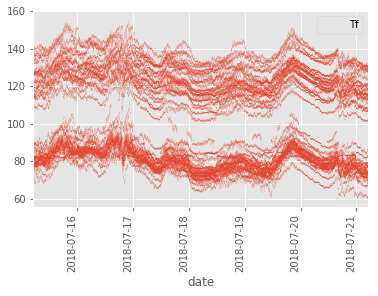

In [8]:
df.date = pd.to_datetime(df.date)
plt.figure()
df.plot('date','Tf',style='o',ms=.01)
plt.xticks(rotation=90)
# plt.show()

# plt.figure()
# df.plot('date','Tc',style='o',ms=.01)
# plt.xticks(rotation=90)
plt.show()

 The given data must be for Death Valley, or another similarly tempered place.
The average temps in the summer are ~116 F, according to the link below.
https://tinyurl.com/y72h3but

7. Write the required python code to change the index for the dataframe from numerically indexed dataframe to one of date using the date column. Make sure you drop the date column once you have created new index.

In [13]:
df.set_index('date',inplace=True,drop=True)
# df.drop('date',axis=1,inplace=True)

In [14]:
# df.groupby('nodeid').head(10)
df.head(10)

,nodeid,Tc,Tf
date,,,
2018-07-15 05:00:02,001e0610b9e9,32.10,89.78
2018-07-15 05:00:02,001e0610e537,27.10,80.78
2018-07-15 05:00:03,001e0610ee61,26.70,80.06
2018-07-15 05:00:03,001e061135cb,25.40,77.72
2018-07-15 05:00:03,001e06113f54,53.20,127.76
2018-07-15 05:00:03,001e06115365,60.60,141.08
2018-07-15 05:00:04,001e061144be,52.80,127.04
2018-07-15 05:00:05,001e0610ee41,26.25,79.25
2018-07-15 05:00:05,001e0610ee43,24.80,76.64


8. Write the required python code that will calculate the range of dates that this data covers.

In [21]:
mindate = df.index.min()
maxdate = df.index.max()
print("Date Range: %s to %s" %(mindate,maxdate))

Date Range: 2018-07-15 05:00:02 to 2018-07-21 05:00:00


9. Write the required python code to describe (count, mean, standard deviation, minimum and maximum value, as well as the percentiles (0.25, 0.5, 0.75)) grouped by `nodeid`.

In [30]:
x = df.sort_values(df.nodeid,axis=1)
x.head()

TypeError: Cannot convert input [date
2018-07-15 05:00:02    001e0610b9e9
2018-07-15 05:00:02    001e0610e537
2018-07-15 05:00:03    001e0610ee61
2018-07-15 05:00:03    001e061135cb
2018-07-15 05:00:03    001e06113f54
2018-07-15 05:00:03    001e06115365
2018-07-15 05:00:04    001e061144be
2018-07-15 05:00:05    001e0610ee41
2018-07-15 05:00:05    001e0610ee43
2018-07-15 05:00:06    001e0610bc12
2018-07-15 05:00:06    001e0610e532
2018-07-15 05:00:07    001e0610f05c
2018-07-15 05:00:08    001e06113cf1
2018-07-15 05:00:08    001e061146cb
2018-07-15 05:00:09    001e06109416
2018-07-15 05:00:09    001e061130f4
2018-07-15 05:00:09    001e061144c0
2018-07-15 05:00:10    001e0610eef2
2018-07-15 05:00:10    001e06113ad8
2018-07-15 05:00:10    001e0611462f
2018-07-15 05:00:11    001e0610e835
2018-07-15 05:00:11    001e06113a48
2018-07-15 05:00:12    001e0610bbff
2018-07-15 05:00:12    001e0610e809
2018-07-15 05:00:13    001e0610e540
2018-07-15 05:00:13    001e0610ef27
2018-07-15 05:00:14    001e0610f730
2018-07-15 05:00:14    001e06113acb
2018-07-15 05:00:15    001e0611537d
2018-07-15 05:00:16    001e0610ee36
                           ...     
2018-07-21 04:59:43    001e06113a48
2018-07-21 04:59:44    001e06115365
2018-07-21 04:59:45    001e06113cf1
2018-07-21 04:59:47    001e0610b9e9
2018-07-21 04:59:47    001e0610e835
2018-07-21 04:59:47    001e061146d6
2018-07-21 04:59:47    001e0611537d
2018-07-21 04:59:48    001e0610e540
2018-07-21 04:59:48    001e061135cb
2018-07-21 04:59:49    001e0610bbff
2018-07-21 04:59:49    001e0610ee82
2018-07-21 04:59:49    001e0610f05c
2018-07-21 04:59:50    001e06109f62
2018-07-21 04:59:51    001e0610e532
2018-07-21 04:59:51    001e0610e537
2018-07-21 04:59:51    001e06113cff
2018-07-21 04:59:51    001e06113d22
2018-07-21 04:59:52    001e0610bbf9
2018-07-21 04:59:52    001e061144c0
2018-07-21 04:59:54    001e0610ba46
2018-07-21 04:59:55    001e0610f730
2018-07-21 04:59:56    001e0610ef27
2018-07-21 04:59:57    001e0610ee5d
2018-07-21 04:59:57    001e06113f54
2018-07-21 04:59:58    001e0610bc12
2018-07-21 04:59:59    001e0610ee36
2018-07-21 04:59:59    001e0610eef4
2018-07-21 04:59:59    001e061130f4
2018-07-21 04:59:59    001e0611536c
2018-07-21 05:00:00    001e0610ef73
Name: nodeid, Length: 940312, dtype: object] of type <class 'pandas.core.series.Series'> to Timestamp

10. Pick a node (e.g. *nodeid* = 001e061146ba) and write the required python code to extract the data for that node from the larger dataframe, display the last 10 items.

11.Write the required python code to resample the data of the single node returning the mean (average) for each day.

12. How many days worth of data is produced in the resampling? (you will need to convert the cell from code to markdown)

13. Write the required python code to resample the data of the single node returning the mean for each hour, display the first 24 values.

---
# Switching Dataset (London Air - www.londonair.org.uk)
Exploration of data that has potential problems.
BG1 == Barking and Dagenham - Rush Green
BQ7 == Bexley - Belvedere West
Date: January 01, 2017 - February 01, 2017

This data represents rainfall measurements at two locations within London and is measured in millimeters (mm).

I have **modified** this data for purpose of learning (that is I introduced errors).

14. Write the required python code to load the new dataset `london-rain.csv` for exploration, then using  `describe()` function what can you say about the data (enter your written answer in cell below your code, you will need to add a cell and change the cell type to markdown).

15. You should have noticed that there are no headers associated with the data, write the required python code to add appropriate headers to data (site, variable, date, value, units, type) and display the result of the `describe` function.

16. What is the average value of rainfall (enter your written answer in cell below your code, you will need to change the cell type to markdown), does this value seem reasonable?

17. What is the minimum value of rainfall (enter your written answer in cell below your code, you will need to change the cell type to markdown), does this value seem reasonable?

18. What is the maximum value of rainfall (enter your written answer in cell below your code, you will need to change the cell type to markdown), does this value seem reasonable?

19. Write the required python code to discover if there are any missing values in the rain dataset.

20. How many rows have missing values? You will need two cells, one for required python code and a second one converted to markdown to write your answer.

21. Write the rquired python code to remove the rows with missing values.

22. Write the required python code to convert the index from simple number to the date column, remove the date column.

23. Write the required python code to write out new cleaned dataset with the file name "london-rain-clean.csv".